# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [3]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Libraries for our case
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To build models for prediction and evaluate metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# To get diferent metric scores
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
# Importing dataset
df = pd.read_csv("ExtraaLearn.csv")


## Data Overview

- Observations
- Sanity checks

In [5]:
#Let's see the general information of our dataset
print("General information about our dataset:")
print(df.info())


# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display summary statistics of the dataset
print("\nSummary statistics:")
print(df.describe())

# Check for missing values in the dataset
print("\nMissing values in each column:")
print(df.isnull().sum())

#Now let's see the shape of the dataset
print("The shape of our dataset is:")
print(df.shape)

General information about our dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status           

NOTE: We can see we have a shape of the dataset like (4612,15) 

We have 0 null values, so that means we have a fully imputed dataset

We can also see from the info that we have 5 numerical columns and 10 categorical columns.

In [7]:
# Checking for duplicate values
df.duplicated().sum()

0

It seems we have 0 duplicated values in our columns. 

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [10]:
#Print a general descriptive analysis:
df.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,3.026126,0.298569
std,13.161454,2.829134,743.828683,1.968125,0.457680
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750,0.000000
50%,51.000000,3.000000,376.000000,2.792000,0.000000
75%,57.000000,5.000000,1336.750000,3.756250,1.000000
max,63.000000,30.000000,2537.000000,18.434000,1.000000


In [11]:
# Making a list of all catrgorical variables
cat_col = list(df.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 50)

ID
EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: count, Length: 4612, dtype: int64
--------------------------------------------------
current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
--------------------------------------------------
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
--------------------------------------------------
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
--------------------------------------------------
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
--------------------------------------------------
print_media_type1
No     4115
Yes     497
Name: count, dtype: int64
--------------------------------------------------
print_media_type2
No     4379
Yes     233
Name

In [12]:
# checking the number of unique values
df["ID"].nunique()

4612

In [13]:
#Then, dropping the ID column:

df.drop(["ID"], axis=1, inplace=True)

### Univariate Analysis

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

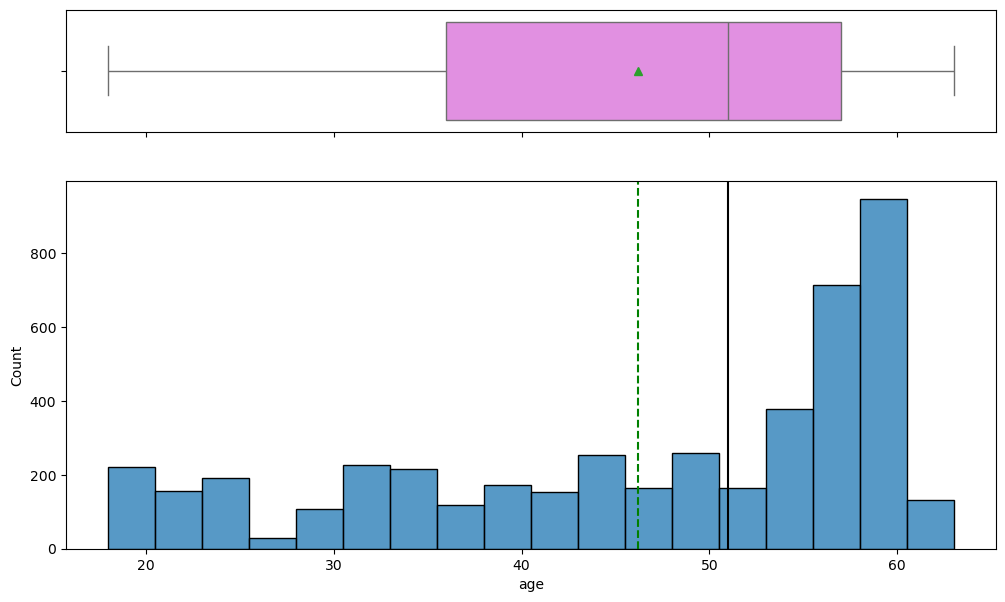

In [16]:
### Observations on age

histogram_boxplot(df, "age") 

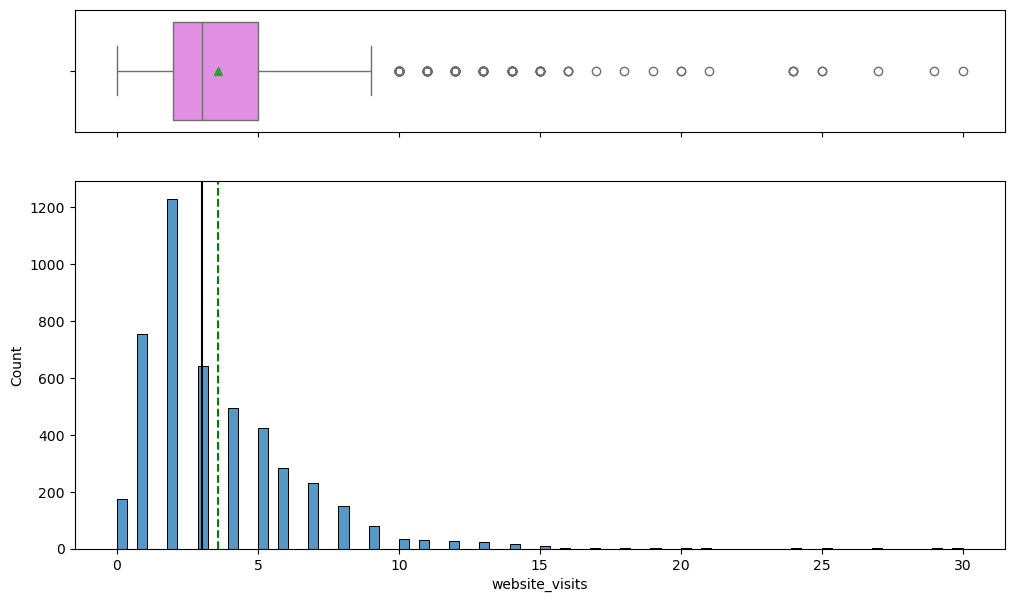

In [17]:
### Observations on website_visits

histogram_boxplot(df, 'website_visits')

In [18]:
# To check how many leads have not visited web-site
df[df["website_visits"] == 0].shape

(174, 14)

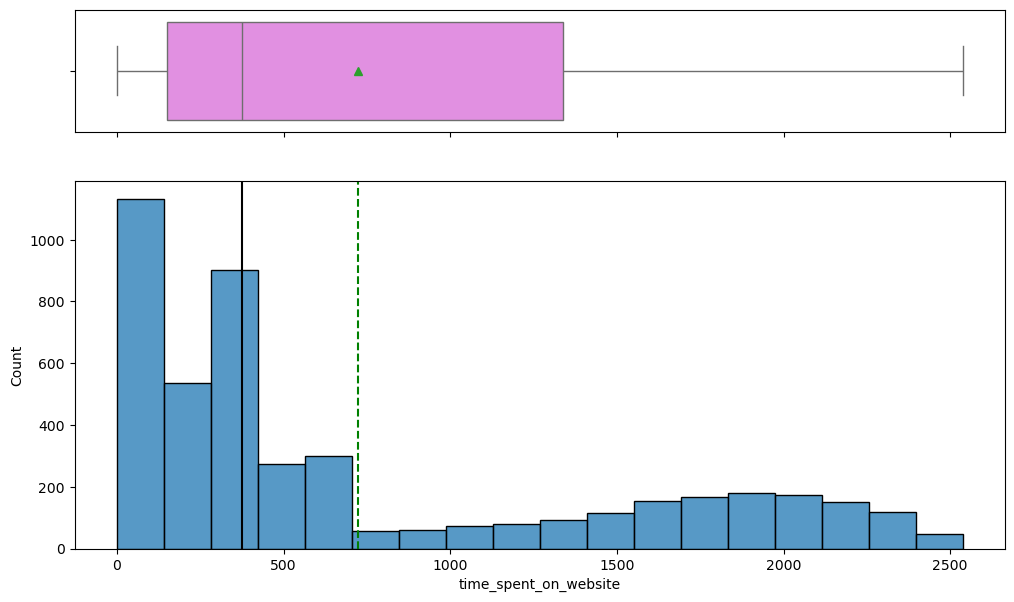

In [19]:
### Observations on number of time_spent_on_website

histogram_boxplot(df, 'time_spent_on_website')

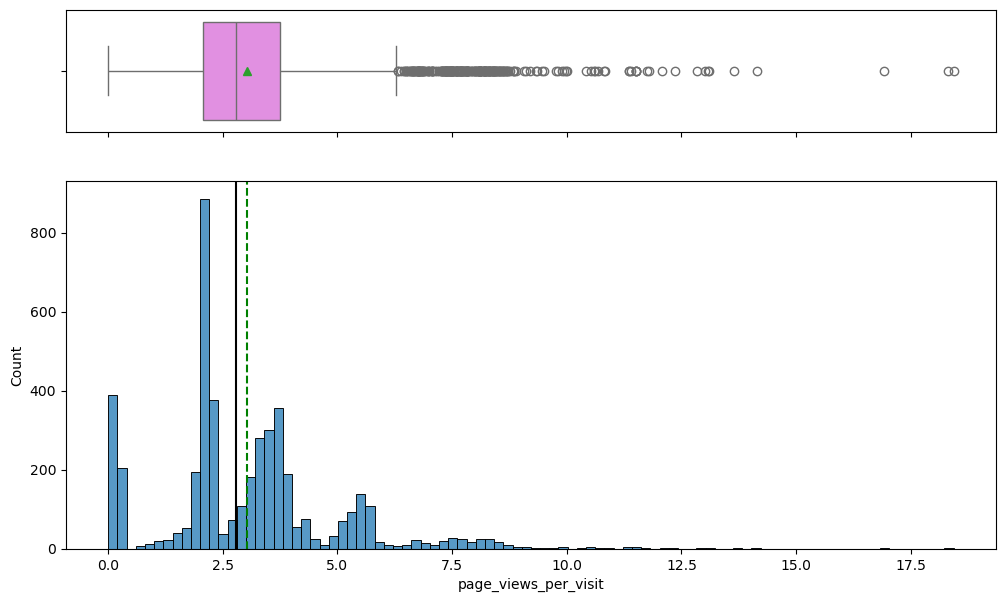

In [20]:
### Observations on number of page_views_per_visit

histogram_boxplot(df, 'page_views_per_visit')

In [21]:
def labeled_barplot(df, feature, perc=False, n=10):
    plt.figure(figsize=(10, 6))
    if perc:
        plt.figure(figsize=(n + 1, 5))
    ax = sns.countplot(
        data=df,  # Corrected argument here
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )
    for p in ax.patches:
        if perc:
            percentage = '{:.1f}%'.format(100 * p.get_height() / len(df))
            x = p.get_x() + p.get_width() / 2 - 0.05
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', fontsize=12)
        else:
            x = p.get_x() + p.get_width() / 2 - 0.05
            y = p.get_height() + 5
            ax.annotate(int(p.get_height()), (x, y), ha='center', fontsize=12)
    plt.show()


<Figure size 1000x600 with 0 Axes>

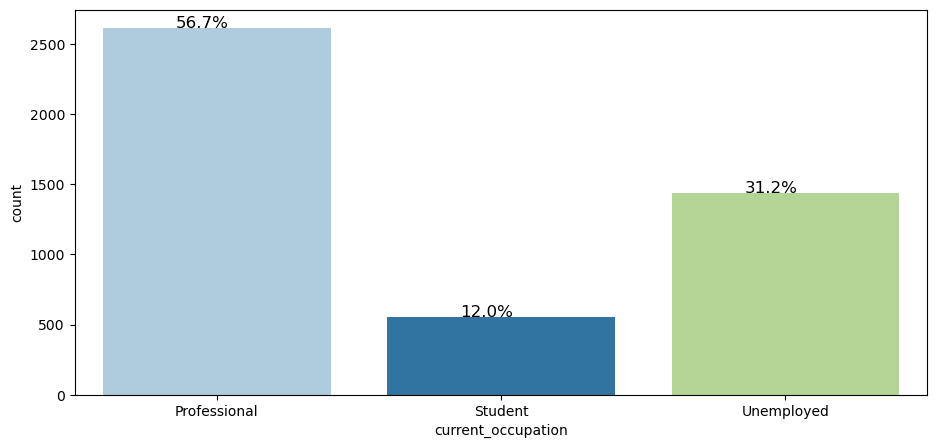

In [22]:
### Observations on current_occupation

labeled_barplot(df, "current_occupation", perc=True)

<Figure size 1000x600 with 0 Axes>

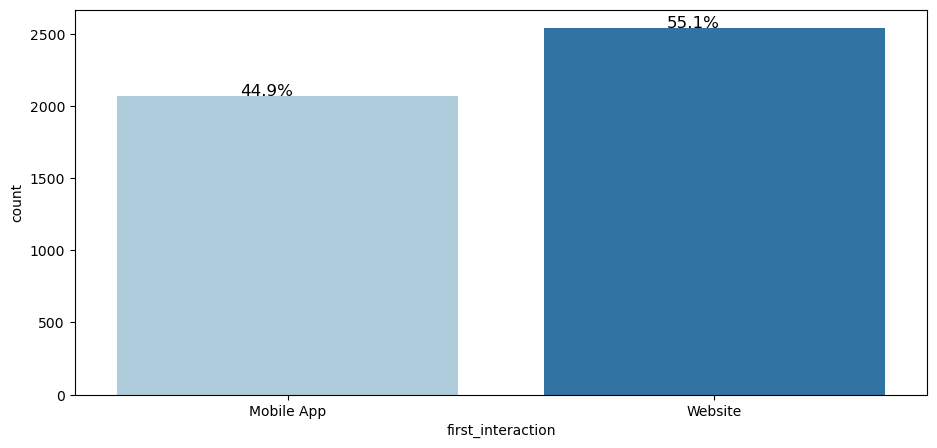

In [23]:
### Observations on number of first_interaction

labeled_barplot(df, 'first_interaction', perc=True)


<Figure size 1000x600 with 0 Axes>

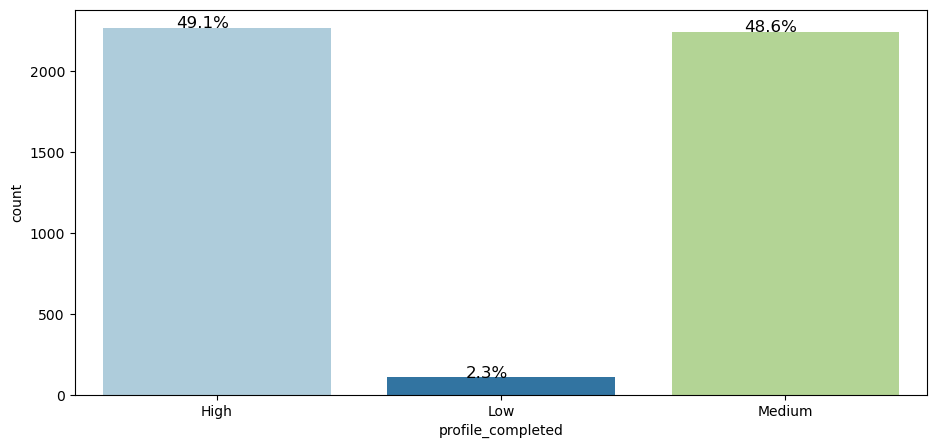

In [24]:
### Observations on profile_completed

labeled_barplot(df, 'profile_completed', perc=True)

<Figure size 1000x600 with 0 Axes>

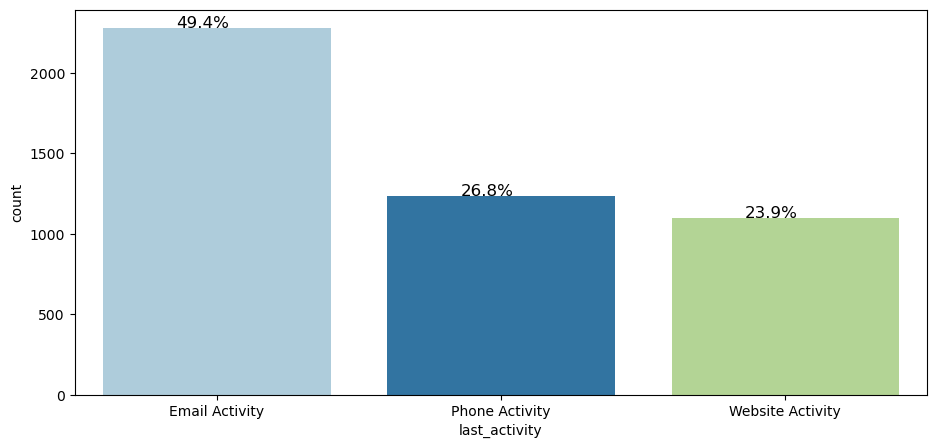

In [25]:
### Observations on last_activity

labeled_barplot(df, 'last_activity', perc=True)


<Figure size 1000x600 with 0 Axes>

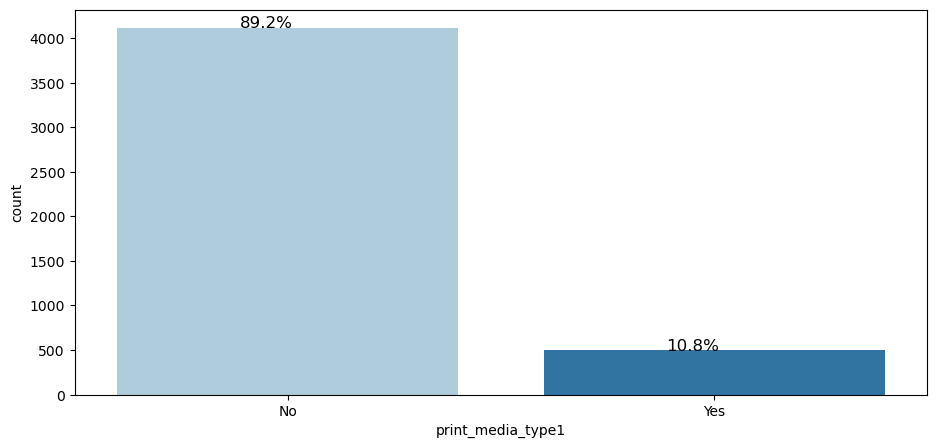

In [26]:
### Observations on print_media_type1

labeled_barplot(df, 'print_media_type1', perc=True)

<Figure size 1000x600 with 0 Axes>

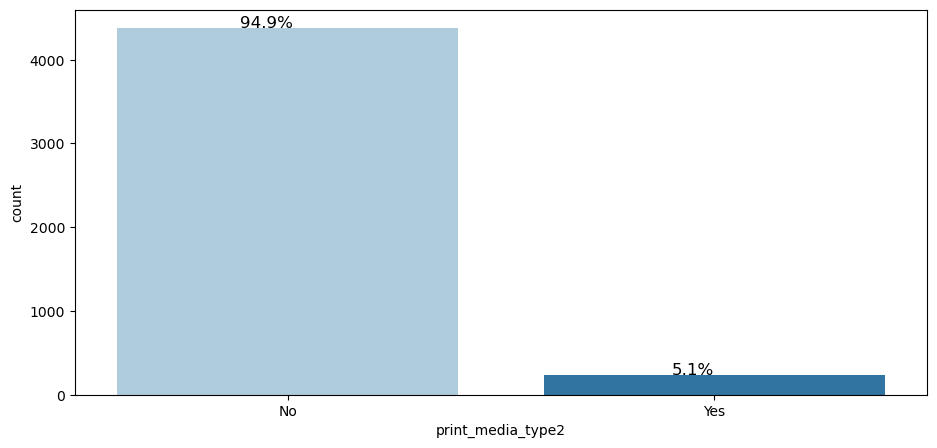

In [27]:
### Observations on print_media_type2

labeled_barplot(df, 'print_media_type2', perc=True)

<Figure size 1000x600 with 0 Axes>

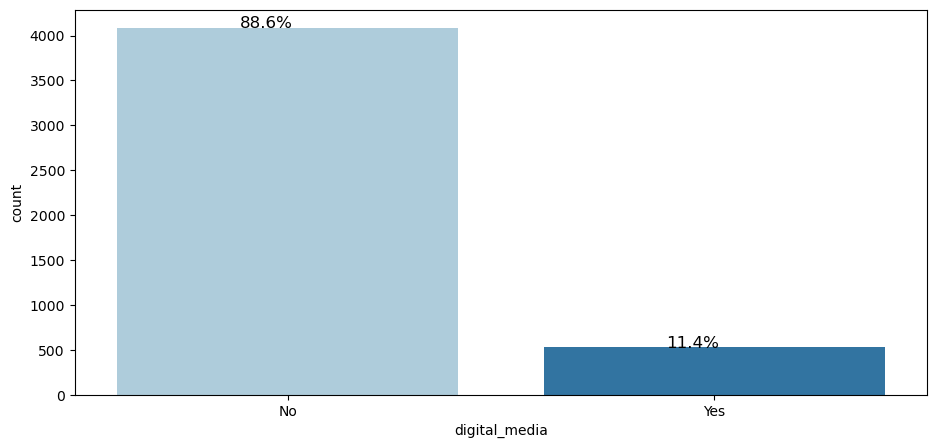

In [28]:
### Observations on digital_media
labeled_barplot(df, 'digital_media', perc=True)

<Figure size 1000x600 with 0 Axes>

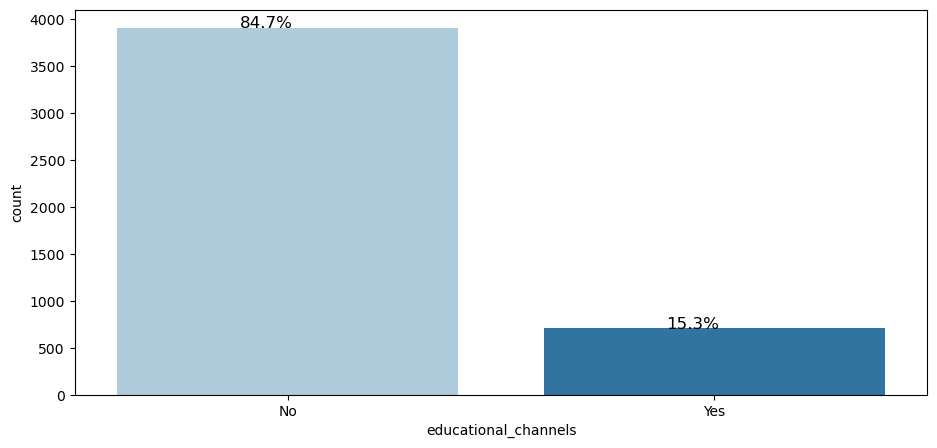

In [29]:
### Observations on educational_channels

labeled_barplot(df, 'educational_channels', perc=True)

<Figure size 1000x600 with 0 Axes>

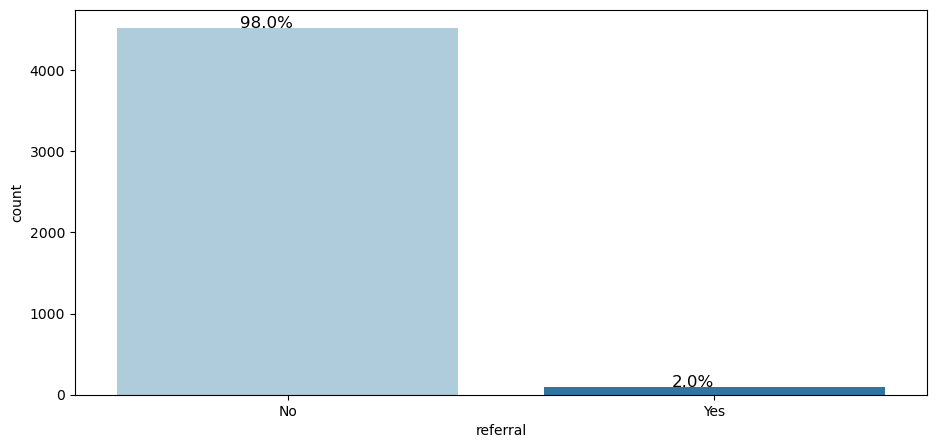

In [30]:
### Observations on referral

labeled_barplot(df, 'referral', perc=True)

<Figure size 1000x600 with 0 Axes>

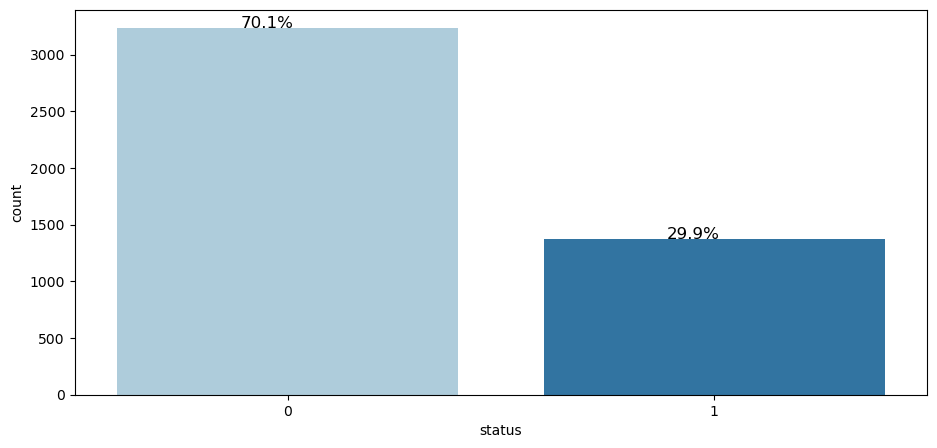

In [31]:
### Observations on status

labeled_barplot(df, 'status', perc=True)

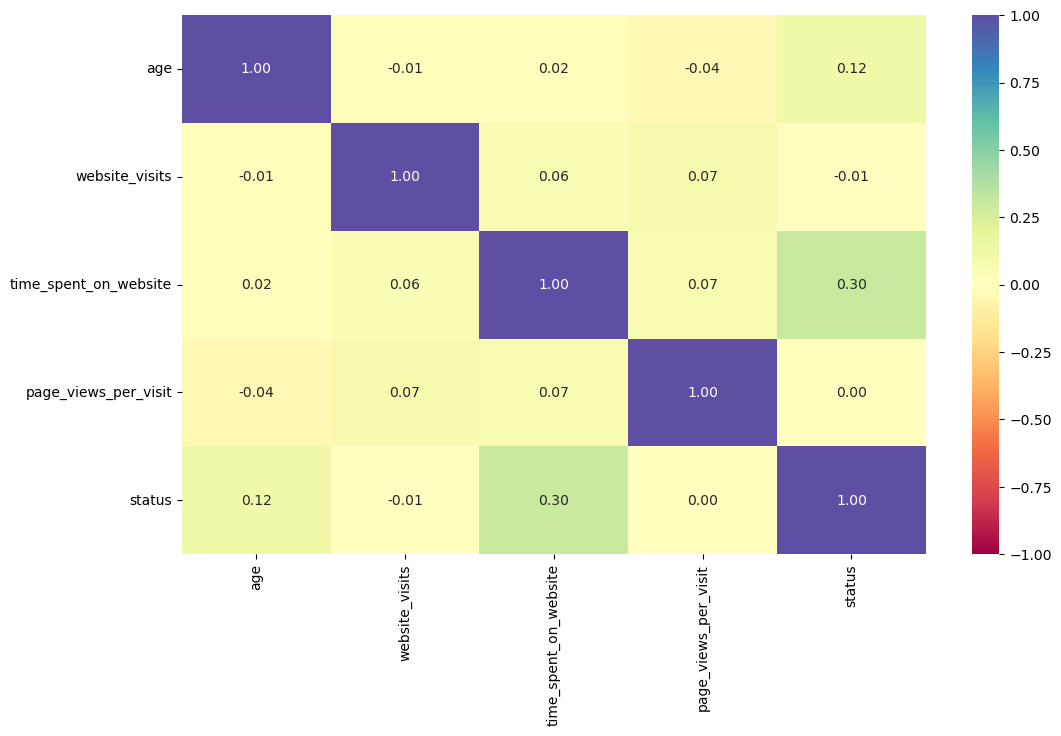

In [32]:
### Bivariate Analysis

cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [33]:
# Creating functions that will help us with further analysis.

### function to plot distributions wrt target


def distribution_plot_wrt_target(df, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = df[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        df=df[df[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        df=df[df[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(df=df, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        df=df,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [34]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = df[predictor].nunique()
    sorter = df[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], df[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(df[predictor], df[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

**Leads will have different expectations from the outcome of the course and the current occupation may play a key role for them to take the program. Let's analyze it**

## EDA

- It is a good idea to explore the data once again after manipulating it.

status                 0     1   All
current_occupation                  
All                 3235  1377  4612
Professional        1687   929  2616
Unemployed          1058   383  1441
Student              490    65   555
------------------------------------------------------------------------------------------------------------------------


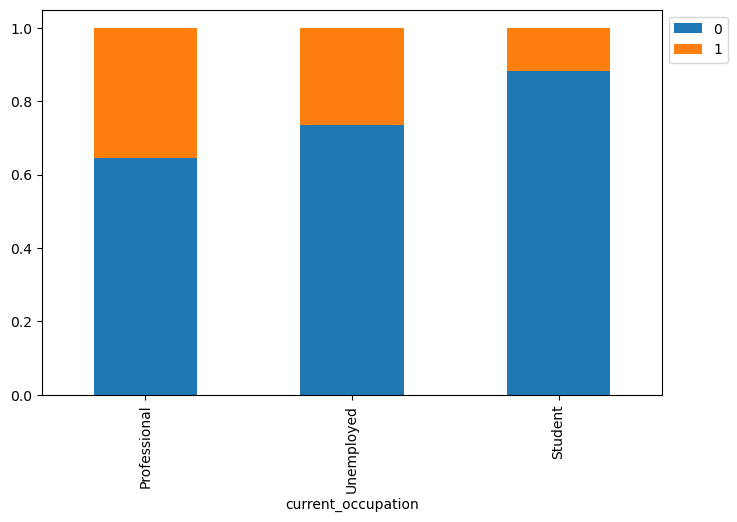

In [37]:
stacked_barplot(df, "current_occupation", "status")

Occupation vs Lead Status (Percentage):
status                      0          1
current_occupation                      
Professional        64.487768  35.512232
Student             88.288288  11.711712
Unemployed          73.421235  26.578765


<Figure size 1000x600 with 0 Axes>

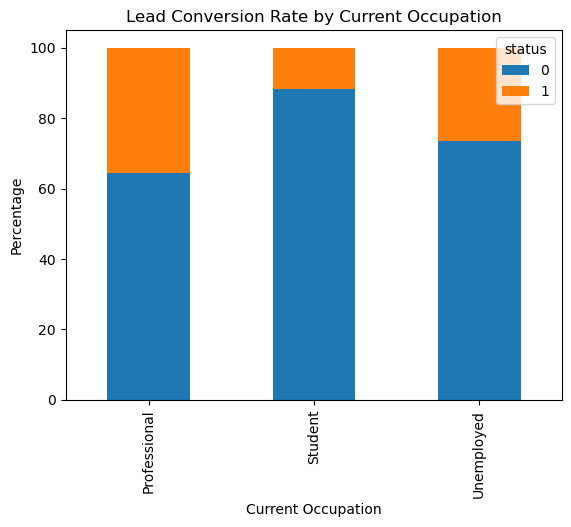

In [38]:
# Analyze the impact of current occupation on lead status
occupation_vs_status = pd.crosstab(df['current_occupation'], df['status'], normalize='index') * 100
print("Occupation vs Lead Status (Percentage):")
print(occupation_vs_status)

# Visualize the relationship between current occupation and lead status
plt.figure(figsize=(10, 6))
occupation_vs_status.plot(kind='bar', stacked=True)
plt.title('Lead Conversion Rate by Current Occupation')
plt.xlabel('Current Occupation')
plt.ylabel('Percentage')
plt.show()


In [39]:
df.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2616.0,49.347477,9.890744,25.0,42.0,54.0,57.0,60.0
Student,555.0,21.144144,2.001114,18.0,19.0,21.0,23.0,25.0
Unemployed,1441.0,50.140180,9.999503,32.0,42.0,54.0,58.0,63.0


First Interaction vs Lead Status (Percentage):
status                     0          1
first_interaction                      
Mobile App         89.468599  10.531401
Website            54.405980  45.594020


<Figure size 1000x600 with 0 Axes>

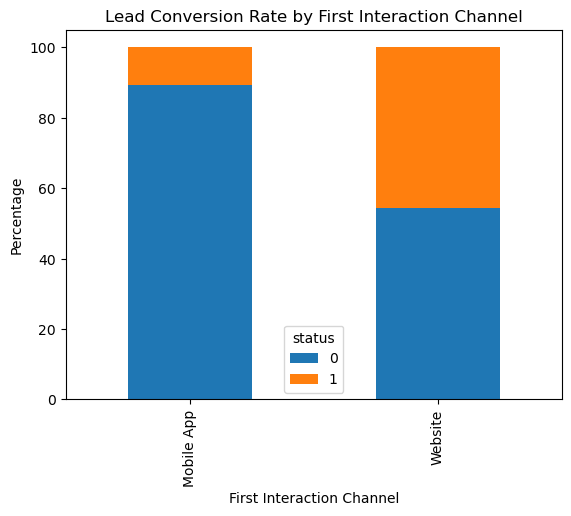

In [40]:
### The company's first interaction with leads should be compelling and persuasive. Let's see if the channels of the first interaction have an impact on the conversion of leads

# Analyze the impact of the first interaction channel on lead status
interaction_vs_status = pd.crosstab(df['first_interaction'], df['status'], normalize='index') * 100
print("First Interaction vs Lead Status (Percentage):")
print(interaction_vs_status)

# Visualize the relationship between first interaction channel and lead status
plt.figure(figsize=(10, 6))
interaction_vs_status.plot(kind='bar', stacked=True)
plt.title('Lead Conversion Rate by First Interaction Channel')
plt.xlabel('First Interaction Channel')
plt.ylabel('Percentage')
plt.show()


Last Activity vs Lead Status (Percentage):
status                    0          1
last_activity                         
Email Activity    69.666374  30.333626
Phone Activity    78.687196  21.312804
Website Activity  61.545455  38.454545


<Figure size 1200x800 with 0 Axes>

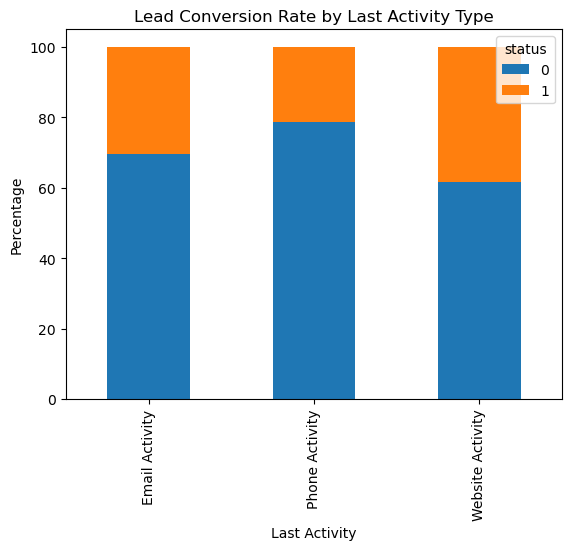

In [41]:
# Analyze the last activity type vs lead status
activity_vs_status = pd.crosstab(df['last_activity'], df['status'], normalize='index') * 100
print("Last Activity vs Lead Status (Percentage):")
print(activity_vs_status)

# Visualize the relationship between last activity type and lead status
plt.figure(figsize=(12, 8))
activity_vs_status.plot(kind='bar', stacked=True)
plt.title('Lead Conversion Rate by Last Activity Type')
plt.xlabel('Last Activity')
plt.ylabel('Percentage')
plt.show()



Conversion Rate for print_media_type1:
print_media_type1
No     0.29599
Yes    0.31992
Name: status, dtype: float64

Conversion Rate for print_media_type2:
print_media_type2
No     0.297328
Yes    0.321888
Name: status, dtype: float64

Conversion Rate for digital_media:
digital_media
No     0.295961
Yes    0.318786
Name: status, dtype: float64

Conversion Rate for educational_channels:
educational_channels
No     0.302022
Yes    0.279433
Name: status, dtype: float64

Conversion Rate for referral:
referral
No     0.290772
Yes    0.677419
Name: status, dtype: float64


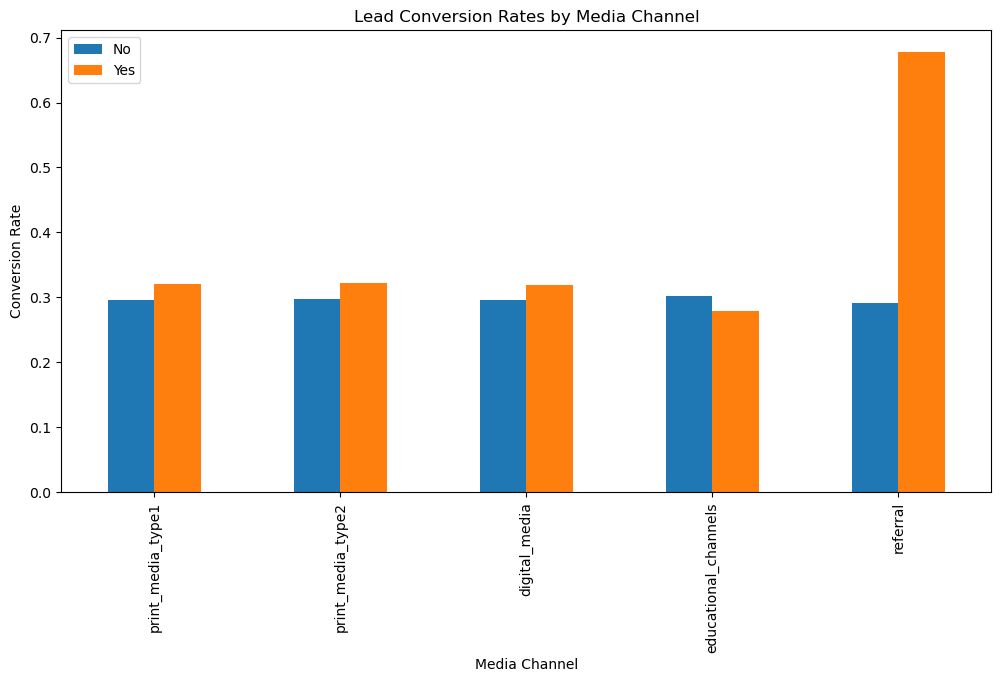

In [42]:
# Analyze the impact of different media channels on lead status
media_channels = ['print_media_type1', 'print_media_type2', 'digital_media', 'educational_channels', 'referral']
conversion_rates = {}
for channel in media_channels:
    conversion_rate = df.groupby(channel)['status'].mean()
    conversion_rates[channel] = conversion_rate

# Print conversion rates for each media channel
for channel, rate in conversion_rates.items():
    print(f"\nConversion Rate for {channel}:")
    print(rate)

# Visualize the conversion rates by media channel
conversion_rates_df = pd.DataFrame(conversion_rates).T
conversion_rates_df.plot(kind='bar', figsize=(12, 6))
plt.title('Lead Conversion Rates by Media Channel')
plt.xlabel('Media Channel')
plt.ylabel('Conversion Rate')
plt.show()


Profile Completion vs Lead Status (Percentage):
status                     0          1
profile_completed                      
High               58.215548  41.784452
Low                92.523364   7.476636
Medium             81.124498  18.875502


<Figure size 1000x600 with 0 Axes>

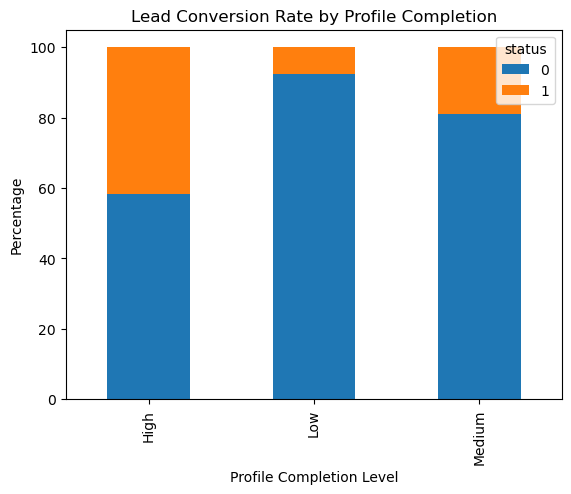

In [43]:
# Analyze the impact of profile completion on lead status
profile_vs_status = pd.crosstab(df['profile_completed'], df['status'], normalize='index') * 100
print("Profile Completion vs Lead Status (Percentage):")
print(profile_vs_status)

# Visualize the relationship between profile completion and lead status
plt.figure(figsize=(10, 6))
profile_vs_status.plot(kind='bar', stacked=True)
plt.title('Lead Conversion Rate by Profile Completion')
plt.xlabel('Profile Completion Level')
plt.ylabel('Percentage')
plt.show()


## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

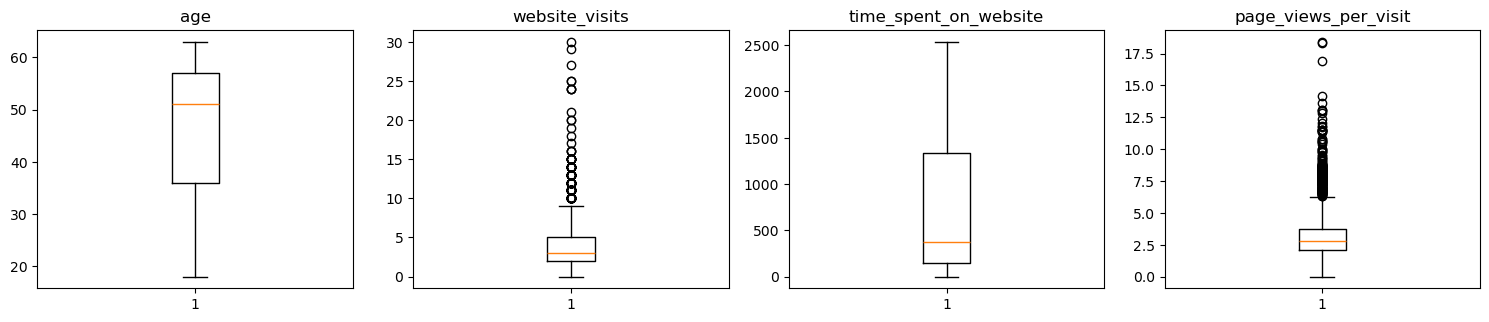

In [45]:
#Outlier Check: Let's check for outliers in the data.
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()


### Data Preparation for modeling

- We want to predict which lead is more likely to be converted.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [47]:
# Define the independent (feature) variables
X = df.drop(columns=["status"])  # Exclude the 'status' column to create feature variables

# Define the dependent (target) variable
Y = df["status"]  # Assign the 'status' column as the target variable

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)  # Create dummy variables and drop the first category to avoid multicollinearity

# Splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [48]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3228, 16)
Shape of test set :  (1384, 16)
Percentage of classes in training set:
status
0    0.704151
1    0.295849
Name: proportion, dtype: float64
Percentage of classes in test set:
status
0    0.695087
1    0.304913
Name: proportion, dtype: float64


## Building a Decision Tree model

In [50]:
# Function to print the classification report and get confusion matrix in a proper format

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))

    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])

    plt.ylabel('Actual')

    plt.xlabel('Predicted')

    plt.show()

## Decision Tree

In [52]:
### Building Decision Tree Model

from sklearn.tree import DecisionTreeClassifier

# Instantiate the Decision Tree Classifier
d_tree = DecisionTreeClassifier(random_state=1)  # You can set hyperparameters if needed

# Fit the model on the training data
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [53]:
#Let's check the performance on test data to see if the model is overfitting.

from sklearn.metrics import accuracy_score

# Predicting on the testing data
y_pred_test1 = d_tree.predict(X_test)

# Calculating the accuracy score
accuracy = accuracy_score(y_test, y_pred_test1)
print(f"Testing Accuracy: {accuracy}")


Testing Accuracy: 0.8128612716763006


###Let's try hyperparameter tuning using GridSearchCV to find the optimal max_depth** to reduce overfitting of the model. We can tune some other hyperparameters as well.



In [55]:
### *Decision Tree - Hyperparameter Tuning

# We will use the class_weight hyperparameter with the value equal to {0: 0.3, 1: 0.7} which is approximately the opposite of the imbalance in the original data.

# This would tell the model that 1 is the important class here.

# Choose the type of classifier
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 10),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }

# Type of scoring used to compare parameter combinations - recall score for class 1
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, criterion='entropy',
                       max_depth=3, min_samples_leaf=5, random_state=7)

We have tuned the model and fit the tuned model on the training data. Now, **let's check the model performance on the training and testing data.**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



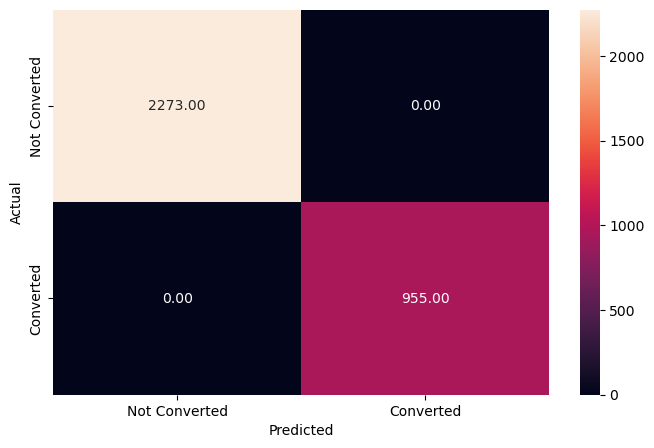

In [57]:
##### Checking model performance on train and test set

# Predicting on the training data
y_pred_train2 = d_tree.predict(X_train)

# Evaluating the model's performance on the training data
metrics_score(y_train, y_pred_train2)

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       962
           1       0.69      0.70      0.70       422

    accuracy                           0.81      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.81      0.81      0.81      1384



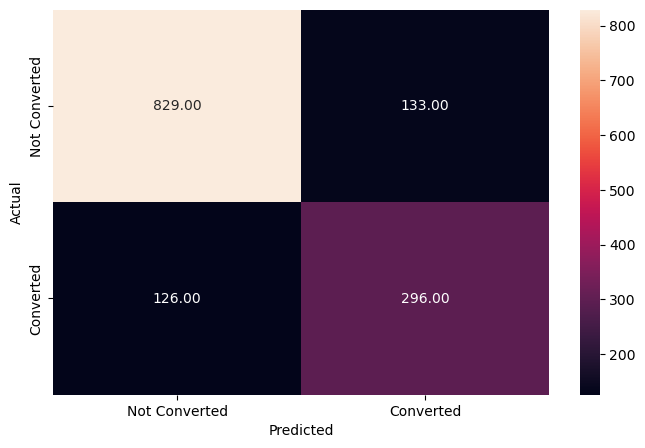

In [58]:
# Predicting on the testing data
y_pred_test2 = d_tree.predict(X_test)

# Evaluating the model's performance on the testing data
metrics_score(y_test, y_pred_test2)


### Visualizing the Decision Tree

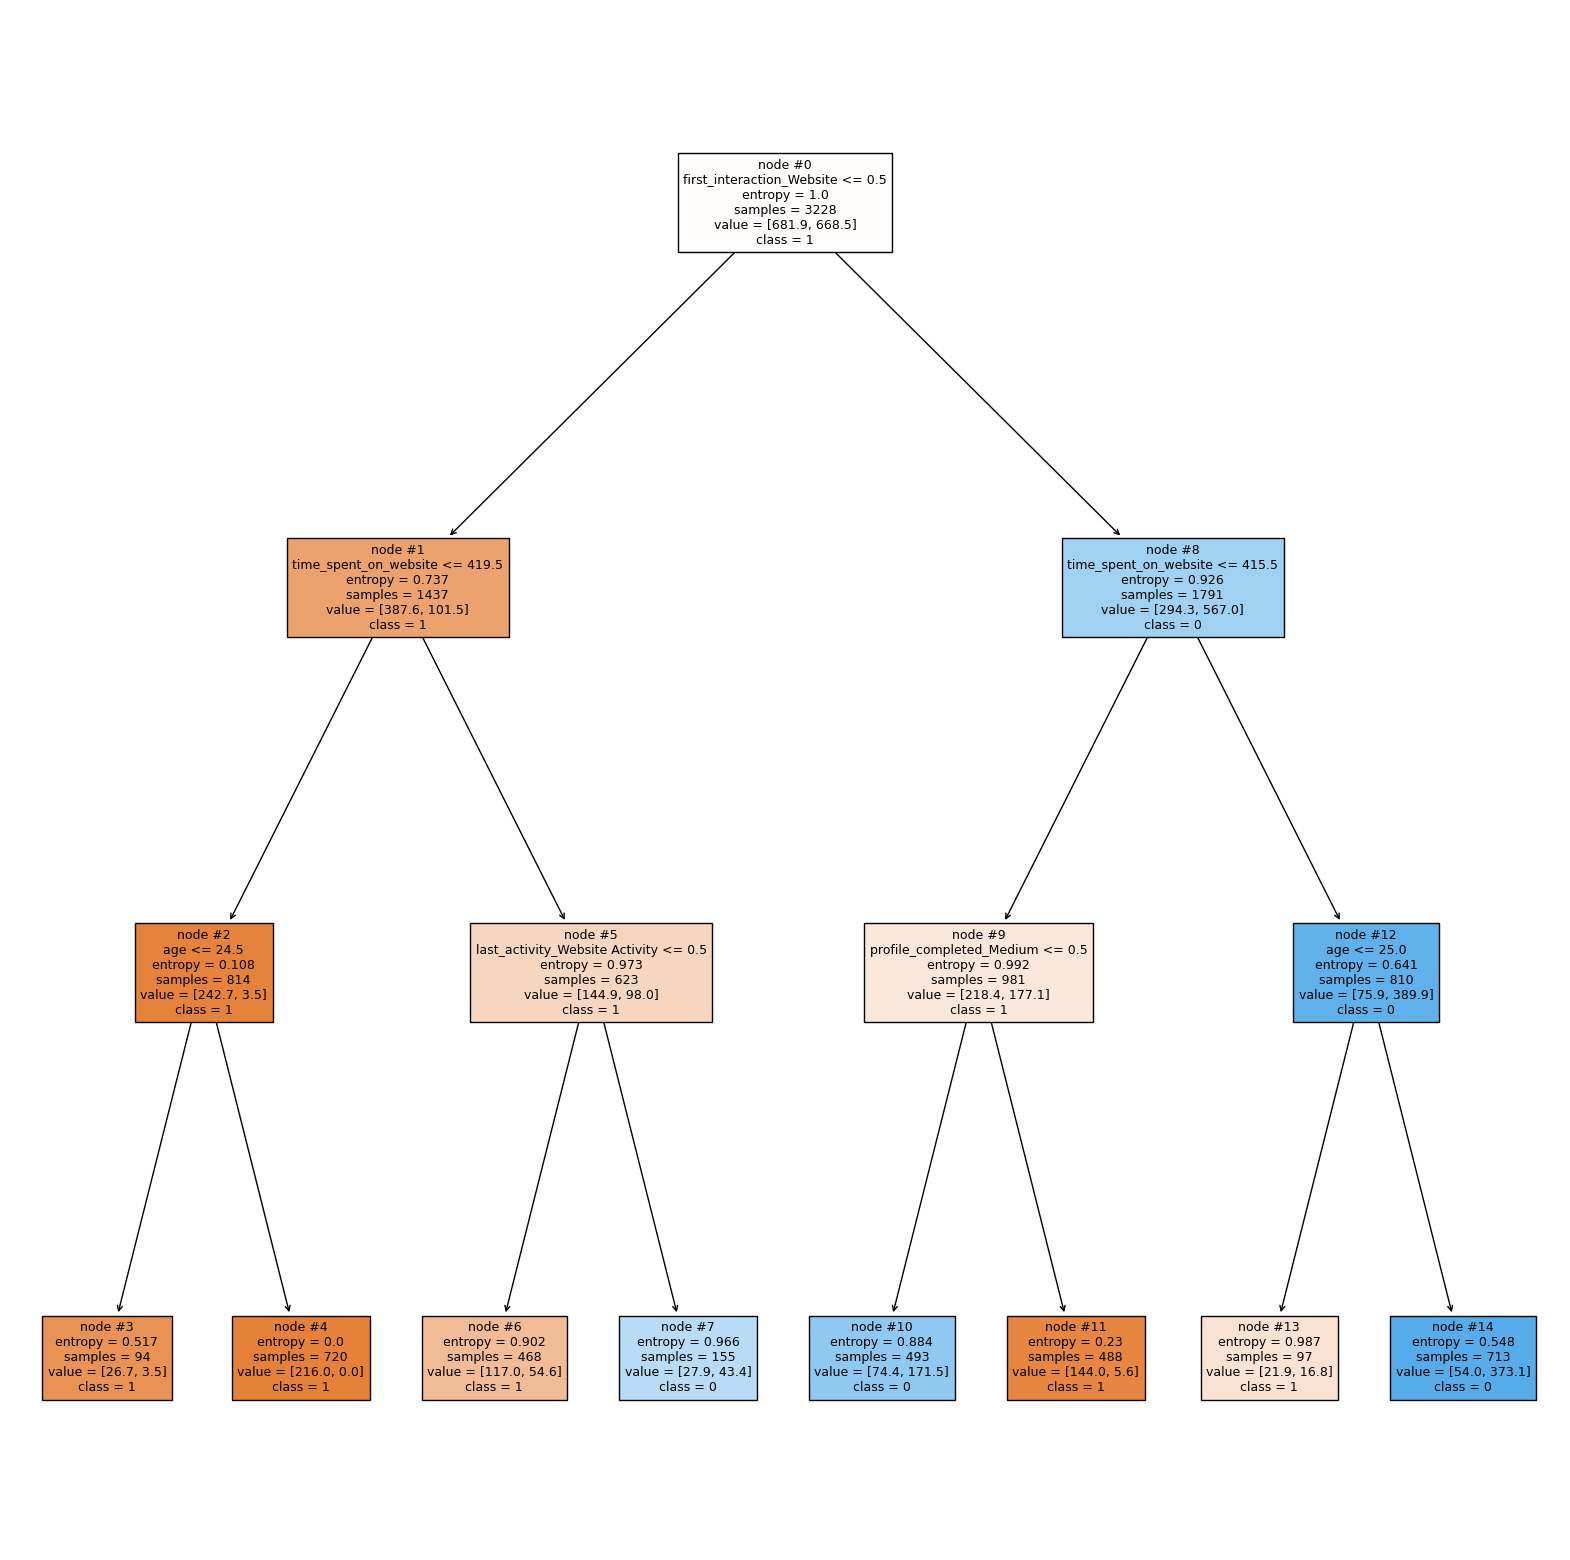

In [60]:
# Import the tree module from sklearn
from sklearn import tree

# Visualizing the tuned decision tree and observing the decision rules
features = list(X.columns)

# Get class names from the target variable Y
class_names = list(Y.unique().astype(str))

plt.figure(figsize=(20, 20))

tree.plot_tree(
    d_tree_tuned, 
    feature_names=features, 
    filled=True, 
    fontsize=9, 
    node_ids=True, 
    class_names=class_names
)

plt.show()

**Note:** Blue leaves represent the converted leads, i.e., **y[1]**, while the orange leaves represent the not converted leads, i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

In [62]:
# Importance of features in the tree building

print (pd.DataFrame(d_tree_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
time_spent_on_website           0.348142
first_interaction_Website       0.327181
profile_completed_Medium        0.239274
age                             0.063893
last_activity_Website Activity  0.021511
website_visits                  0.000000
page_views_per_visit            0.000000
current_occupation_Student      0.000000
current_occupation_Unemployed   0.000000
profile_completed_Low           0.000000
last_activity_Phone Activity    0.000000
print_media_type1_Yes           0.000000
print_media_type2_Yes           0.000000
digital_media_Yes               0.000000
educational_channels_Yes        0.000000
referral_Yes                    0.000000


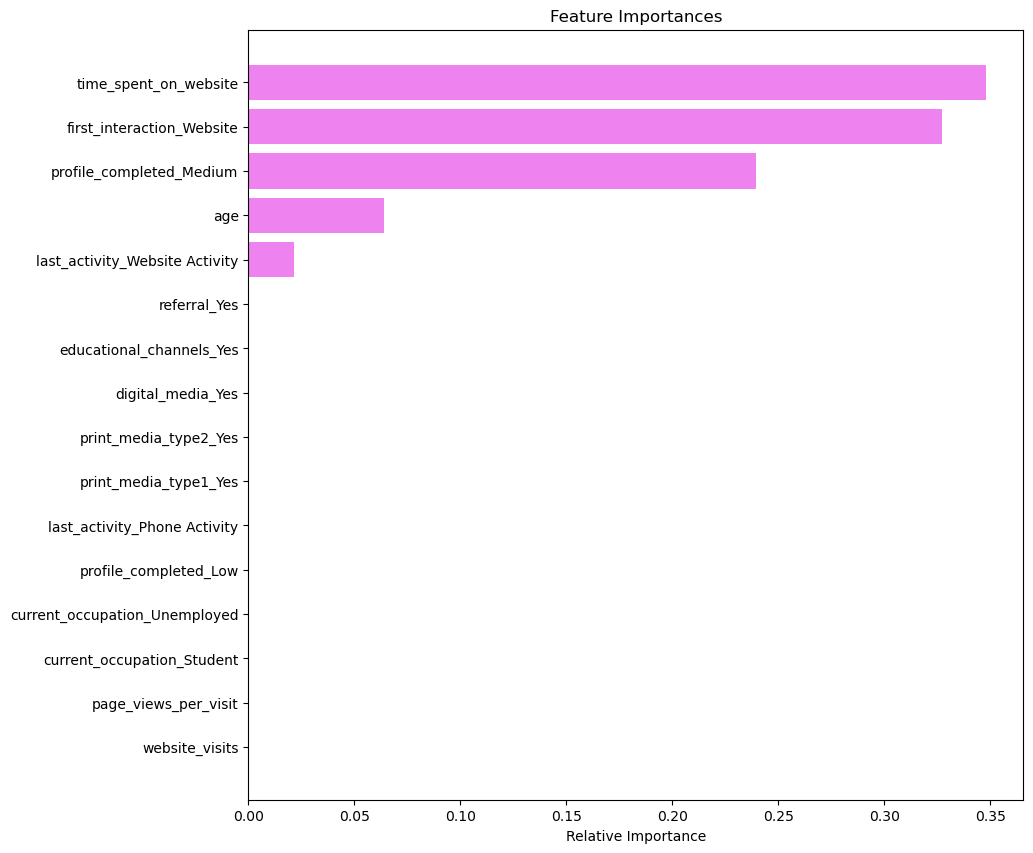

In [63]:
# Plotting the feature importance
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

**Observations:**
- **Time spent on the website and first_interaction_website are the most important features** **followed by profile_completed, age, and last_activity**.
- **The rest of the variables have no impact in this model, while deciding whether a lead will be converted or not**.

Now, let's build another model - **a random forest classifier.**

## Do we need to prune the tree?

The tree seems to have a significant number of nodes and some nodes have a small number of samples, indicating that the tree might be overfitting the training data. In this case, pruning would reduce the size of the tree by removing parts of the three that do not provide significant power in predicting target outcomes. This is typically done to enhace the model's ability to generalize tp unseen data.

Let's try some kind of pruning:

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Pre-pruning by setting max_depth, min_samples_split, and min_samples_leaf
d_tree_pruned = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=1)

# Fitting the pruned decision tree classifier on the training data
d_tree_pruned.fit(X_train, y_train)

# Checking performance on the training data
y_pred_train_pruned = d_tree_pruned.predict(X_train)
print("Training Performance with Pre-pruning:")
print(classification_report(y_train, y_pred_train_pruned))
print(confusion_matrix(y_train, y_pred_train_pruned))

# Checking performance on the testing data
y_pred_test_pruned = d_tree_pruned.predict(X_test)
print("Testing Performance with Pre-pruning:")
print(classification_report(y_test, y_pred_test_pruned))
print(confusion_matrix(y_test, y_pred_test_pruned))

Training Performance with Pre-pruning:
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2273
           1       0.77      0.77      0.77       955

    accuracy                           0.86      3228
   macro avg       0.84      0.84      0.84      3228
weighted avg       0.86      0.86      0.86      3228

[[2059  214]
 [ 223  732]]
Testing Performance with Pre-pruning:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       962
           1       0.77      0.74      0.75       422

    accuracy                           0.85      1384
   macro avg       0.83      0.82      0.82      1384
weighted avg       0.85      0.85      0.85      1384

[[870  92]
 [111 311]]


In [68]:
# Fit the model fully without pre-pruning first
d_tree_full = DecisionTreeClassifier(random_state=1)
d_tree_full.fit(X_train, y_train)

# Get the cost complexity pruning path
path = d_tree_full.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train decision trees with different values of ccp_alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Find the optimal ccp_alpha using cross-validation
from sklearn.model_selection import cross_val_score
alpha_scores = [cross_val_score(clf, X_train, y_train, cv=5).mean() for clf in clfs]

# Choose the alpha with the best cross-validation score
optimal_alpha = ccp_alphas[alpha_scores.index(max(alpha_scores))]
print(f"Optimal ccp_alpha: {optimal_alpha}")

# Retrain the model with the optimal alpha
d_tree_tuned = DecisionTreeClassifier(random_state=1, ccp_alpha=optimal_alpha)
d_tree_tuned.fit(X_train, y_train)

# Evaluate the pruned tree
y_pred_train_tuned = d_tree_tuned.predict(X_train)
print("Training Performance with Post-pruning:")
print(classification_report(y_train, y_pred_train_tuned))
print(confusion_matrix(y_train, y_pred_train_tuned))

y_pred_test_tuned = d_tree_tuned.predict(X_test)
print("Testing Performance with Post-pruning:")
print(classification_report(y_test, y_pred_test_tuned))
print(confusion_matrix(y_test, y_pred_test_tuned))

Optimal ccp_alpha: 0.0015028089601862183
Training Performance with Post-pruning:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      2273
           1       0.83      0.71      0.76       955

    accuracy                           0.87      3228
   macro avg       0.86      0.82      0.84      3228
weighted avg       0.87      0.87      0.87      3228

[[2130  143]
 [ 275  680]]
Testing Performance with Post-pruning:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       962
           1       0.83      0.69      0.75       422

    accuracy                           0.86      1384
   macro avg       0.85      0.81      0.83      1384
weighted avg       0.86      0.86      0.86      1384

[[901  61]
 [131 291]]


## Building a Random Forest model

In [70]:
### Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_estimator = RandomForestClassifier(random_state=1)

# Fit the Random Forest classifier on the training data
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2273
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228



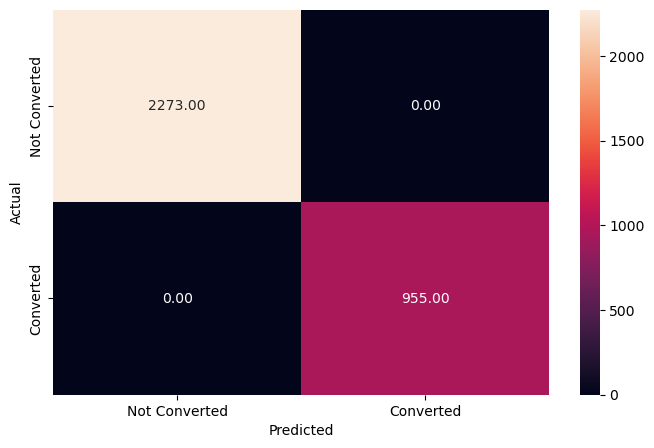

In [71]:
# Predicting on the training data
y_pred_train3 = rf_estimator.predict(X_train)

# Evaluate the performance using the custom metrics_score function
metrics_score(y_train, y_pred_train3)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       962
           1       0.78      0.68      0.73       422

    accuracy                           0.84      1384
   macro avg       0.82      0.80      0.81      1384
weighted avg       0.84      0.84      0.84      1384



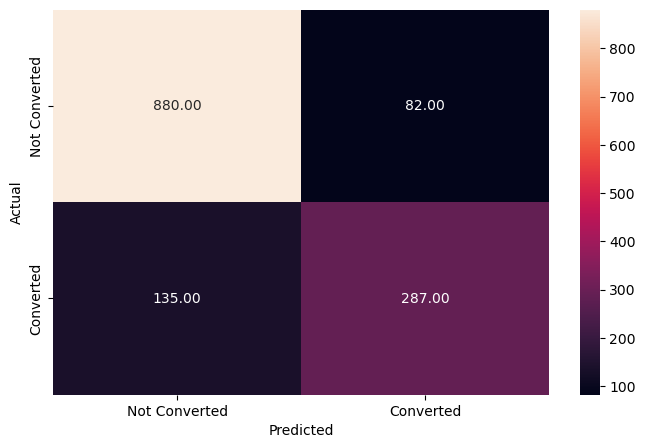

In [72]:
# Predicting on the testing data
y_pred_test3 = rf_estimator.predict(X_test)

# Evaluate the performance using the custom metrics_score function
metrics_score(y_test, y_pred_test3)

## Do we need to prune the tree?

In this case, it seems to be good and it is not necessary at all to prune the tree.

However, Let's see if we can get a better model by tuning the random forest classifier

In [76]:
### Random Forest Classifier - Hyperparameter Tuning
# Let's try tuning some of the important hyperparameters of the Random Forest Classifier.

# We will not tune the `criterion` hyperparameter as we know from hyperparameter tuning for decision trees that `entropy` is a better splitting criterion for this data.

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the initial RandomForestClassifier
rf_estimator = RandomForestClassifier(criterion="entropy", random_state=7)

# Run the grid search on the training data using the original estimator
grid_obj = GridSearchCV(estimator=rf_estimator, param_grid=parameters, scoring=scorer, cv=5)

# Fit the grid search object to the training data
grid_obj = grid_obj.fit(X_train, y_train)

# Save the best estimator to variable rf_estimator_tuned
rf_estimator_tuned = grid_obj.best_estimator_

In [77]:
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=5, random_state=7)

In [78]:
# Predicting the training data
y_pred_train4 = rf_estimator_tuned.predict(X_train)

# If you want to see the performance metrics, you can use:
from sklearn.metrics import accuracy_score, classification_report

# For classification problems
accuracy = accuracy_score(y_train, y_pred_train4)
report = classification_report(y_train, y_pred_train4)

print("Training Accuracy:", accuracy)
print("Classification Report:\n", report)

# For regression problems, use appropriate metrics such as mean squared error
from sklearn.metrics import mean_squared_error

# For regression problems
mse = mean_squared_error(y_train, y_pred_train4)
print("Training Mean Squared Error:", mse)

Training Accuracy: 0.8900247831474597
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      2273
           1       0.85      0.76      0.80       955

    accuracy                           0.89      3228
   macro avg       0.88      0.85      0.86      3228
weighted avg       0.89      0.89      0.89      3228

Training Mean Squared Error: 0.10997521685254028


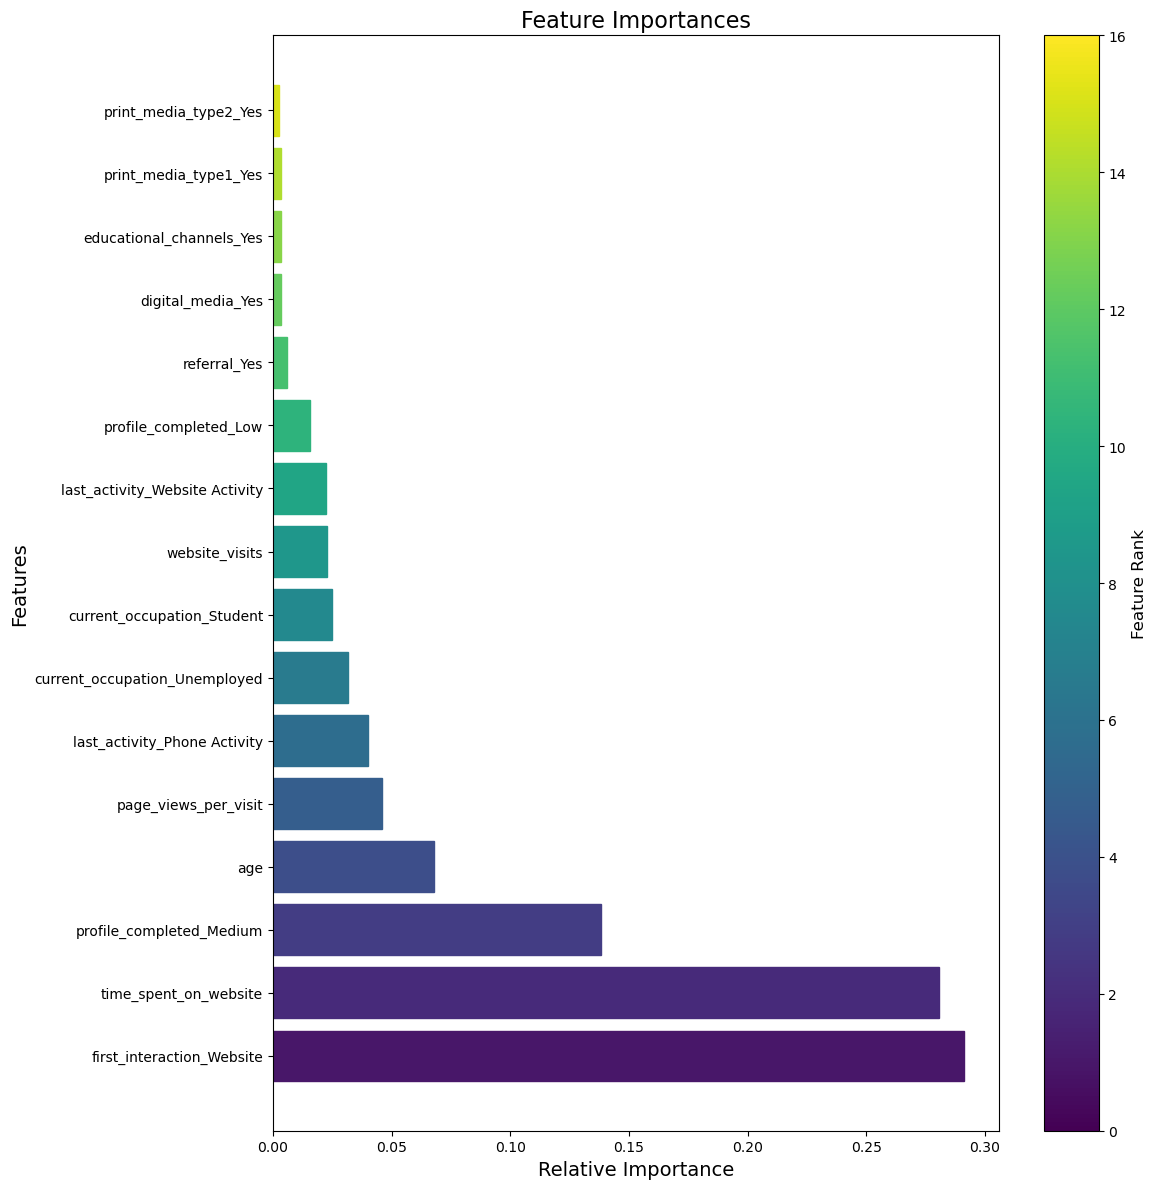

In [79]:
# One of the drawbacks of ensemble models is that we lose the ability to obtain an interpretation of the model.
# We cannot observe the decision rules for random forests the way we did for decision trees.
# So, let's just check the feature importance of the model.

# Assuming rf_estimator_tuned is your fitted RandomForest model
importances = rf_estimator_tuned.feature_importances_

# Get the indices of features sorted by importance
indices = np.argsort(importances)[::-1]

# Assuming X is your feature dataframe and contains the column names
feature_names = list(X.columns)

# Create a color palette
palette = sns.color_palette("viridis", len(indices))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 12))
plt.title('Feature Importances', fontsize=16)

# Plot horizontal bars
bars = ax.barh(range(len(indices)), importances[indices], align='center')

# Color the bars using the palette
for bar, color in zip(bars, palette):
    bar.set_color(color)

# Set y-ticks and labels
ax.set_yticks(range(len(indices)))
ax.set_yticklabels([feature_names[i] for i in indices])

ax.set_xlabel('Relative Importance', fontsize=14)
ax.set_ylabel('Features', fontsize=14)

# Add a colorbar legend
sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=0, vmax=len(indices)))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label('Feature Rank', fontsize=12)

plt.tight_layout()
plt.show()

**Observations:**
- Similar to the decision tree model, **time spent on website, first_interaction_website, profile_completed, and age are the top four features** that help distinguish between not converted and converted leads.
- Unlike the decision tree, **the random forest gives some importance to other variables like occupation, page_views_per_visit, as well.** This implies that the random forest is giving importance to more factors in comparison to the decision tree.

## Actionable Insights and Recommendations

In general, we can summarize some relevant aspects/recommendations extracted from our analysis as follows:

1. Enhance website engagement: Improve content and course previews to keep users on the site longer, potentially increasing lead conversion rates.
2. Optimize profile completion: Streamline the profile section, focusing on essential information to encourage 100% completion, as high and medium completion rates significantly impact lead conversion.
3. Target professionals and offer student discounts: Focus marketing efforts on professionals while providing promotional discounts to students to improve conversion rates across different occupations.
4. Improve referral program: Develop an alumni network, showcase successful placements, and offer referral bonuses to increase the impact of referrals on conversion rates.